In [1]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 28 from C header, got 32 from PyObject


In [2]:
J = np.array([[1.03, 0 , 0], [0, 1.54, 0], [0, 0, 1.82]])
Lambda0 = 10**(-4)
delta_b2 = 0.001
lambdaa = 0.07
P= 1e-3 * np.eye(3)
delta_t = 0.1
Lambda_k = Lambda0 * np.eye(3)
i = np.pi/3
J_inv = np.linalg.inv(J)
w0 = 2*np.pi*(1-3*400/6400)/(24*3600)
B0 = 2.48e-5

#initial conditions
a0 = [np.pi/12, np.pi/6, np.pi/3]
d11 = np.cos(a0[0])*np.cos(a0[1])
d12 = np.sin(a0[1])
d13 = -np.sin(a0[0])*np.cos(a0[1])
d21 = -np.cos(a0[0])*np.sin(a0[1])*np.cos(a0[2]+np.sin(a0[0]))*np.sin(a0[2])
d22 = np.cos(a0[1])*np.cos(a0[2])
d23 = np.sin(a0[0])*np.sin(a0[1])*np.cos(a0[2])+np.cos(a0[0])*np.sin(a0[2])
d31 = np.sin(a0[0])*np.cos(a0[2])+np.cos(a0[0])*np.sin(a0[1])*np.sin(a0[2])
d32 = -np.cos(a0[1])*np.sin(a0[2])
d33 = -np.sin(a0[0])*np.sin(a0[1])*np.sin(a0[2])+np.cos(a0[0])*np.cos(a0[2])

In [3]:
def to_raw(x):
    return x.reshape(1, -1).squeeze()

def module(x):
    x = to_raw(x)
    return np.sqrt(np.sum(x**2))

def scalar(x, y):
    x = to_raw(x)
    y = to_raw(y)
    
    return np.dot(x, y)

In [4]:
a = np.arange(3).reshape(-1, 1)
b = np.arange(9).reshape(3, 3)

print(a)
print(b)
print(np.dot(b, a))

[[0]
 [1]
 [2]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 5]
 [14]
 [23]]


In [5]:
'''
x0  = [0.05, 0.1, 0.17, d11, d12, d13, d21, d22, d23, d31, d32, d33]
w = np.array(x0[0:3])
A = np.array(x0[3:]).reshape(3, 3)

    S_proiz1 = -w[2]*A[0, 2] + w[0]*A[2, 2] - w[1]*A[0, 1] + w[0]*A[1, 1]
    S_proiz2 = w[1]*A[0,0] - w[0]*A[1,0] - w[2]*A[1, 2] + w[1]*A[2, 2]
    S_proiz3 = w[2]*A[1, 1] - w[1]*A[2, 1] + w[2]*A[0,0] - w[0]*A[2, 2]
    S_proiz = np.array([S_proiz1, S_proiz2, S_proiz3]).reshape(-1, 1)
    
    S1 = A[1,2] - A[2,1]
    S2 = A[2,0] - A[0,2]
    S3 = A[0,1] - A[1,0]
    S = np.array([S1, S2, S3]).reshape(-1, 1)
    
    M1 = (J[2,2]-J[1,1])*(-A[0,0]*A[0,2])
    M2 = (J[2,2]-J[0,0])*(A[0,0]*A[0,1])
    M3 = (J[0,0]-J[1,1])*(A[0,1]*A[0,2])
    M = 3*w0**2*np.array([M1, M2, M3]).reshape(-1, 1)

    u = w0*t
    B1 = -2*np.sin(u) * np.sin(i)
    B2 = np.cos(u)*np.sin(i)
    B3 = np.cos(i)
    B = (B0*np.array([B1, B2, B3])).reshape(-1, 1)
    
    w_col = w.reshape(-1, 1)
    a = (lambdaa*(np.cross(w, to_raw(np.dot(J,w_col))).reshape(-1, 1) - M) - np.dot(l,(np.dot(J,S_proiz) + np.dot(P,S))) - lambdaa*np.dot(P,w_col))*delta_t + np.dot(np.dot(l,J),S)
    a1 = scalar(a, B)/module(B)
    b = -np.dot(J,S)
    b1 = -scalar(b, B) / module(B)
    d = lambdaa*delta_t*B
    mod_b = module(b)
    mod_d = module(d)
    print(mod_b, mod_d, np.cross(to_raw(d), to_raw(b)))
    print('------------------------')
    b2 = mod_b**2 * mod_d / module(np.cross(to_raw(d), to_raw(b))) - scalar(b, d)**2 / (module(np.cross(to_raw(d), to_raw(b)))*mod_d)
    
    
    l = np.copy(Lambda_k)
    l[2, 2] = Lambda0
    l[0, 0] = Lambda0
    l[0, 1] = (-a1- l[0, 0]*b1)*(b2+delta_b2)
    l[1, 0] = np.copy(l[0, 1]) 
    l[1, 1] = Lambda0 + l[0, 1]**2 / l[0, 0]
    '''

"\nx0  = [0.05, 0.1, 0.17, d11, d12, d13, d21, d22, d23, d31, d32, d33]\nw = np.array(x0[0:3])\nA = np.array(x0[3:]).reshape(3, 3)\n\n    S_proiz1 = -w[2]*A[0, 2] + w[0]*A[2, 2] - w[1]*A[0, 1] + w[0]*A[1, 1]\n    S_proiz2 = w[1]*A[0,0] - w[0]*A[1,0] - w[2]*A[1, 2] + w[1]*A[2, 2]\n    S_proiz3 = w[2]*A[1, 1] - w[1]*A[2, 1] + w[2]*A[0,0] - w[0]*A[2, 2]\n    S_proiz = np.array([S_proiz1, S_proiz2, S_proiz3]).reshape(-1, 1)\n    \n    S1 = A[1,2] - A[2,1]\n    S2 = A[2,0] - A[0,2]\n    S3 = A[0,1] - A[1,0]\n    S = np.array([S1, S2, S3]).reshape(-1, 1)\n    \n    M1 = (J[2,2]-J[1,1])*(-A[0,0]*A[0,2])\n    M2 = (J[2,2]-J[0,0])*(A[0,0]*A[0,1])\n    M3 = (J[0,0]-J[1,1])*(A[0,1]*A[0,2])\n    M = 3*w0**2*np.array([M1, M2, M3]).reshape(-1, 1)\n\n    u = w0*t\n    B1 = -2*np.sin(u) * np.sin(i)\n    B2 = np.cos(u)*np.sin(i)\n    B3 = np.cos(i)\n    B = (B0*np.array([B1, B2, B3])).reshape(-1, 1)\n    \n    w_col = w.reshape(-1, 1)\n    a = (lambdaa*(np.cross(w, to_raw(np.dot(J,w_col))).reshape(-1, 

In [6]:
# y = 12-array [w1, w2, w3, a11, a12, a13, a21+ ...]
                        
def lambda_iter(t, w, A, l):
    
    S_proiz1 = -w[2]*A[0, 2]+w[0]*A[2, 2]-w[1]*A[0, 1] + w[0]*A[1, 1]
    S_proiz2 = w[1]*A[0,0] - w[0]*A[1,0] - w[2]*A[1, 2] + w[1]*A[2, 2]
    S_proiz3 = w[2]*A[1, 1] - w[1]*A[2, 1] + w[2]*A[0,0] - w[0]*A[2, 2]
    S_proiz = np.array([S_proiz1, S_proiz2, S_proiz3]).reshape(-1, 1)
    
    S1 = A[1,2] - A[2,1]
    S2 = A[2,0] - A[0,2]
    S3 = A[0,1] - A[1,0]
    S = np.array([S1, S2, S3]).reshape(-1, 1)
    
    M1 = (J[2,2]-J[1,1])*(-A[0,0]*A[0,2])
    M2 = (J[2,2]-J[0,0])*(A[0,0]*A[0,1])
    M3 = (J[0,0]-J[1,1])*(A[0,1]*A[0,2])
    M = 3*w0**2*np.array([M1, M2, M3]).reshape(-1, 1)

    u = w0*t
    B1 = -2*np.sin(u) * np.sin(i)
    B2 = np.cos(u)*np.sin(i)
    B3 = np.cos(i)
    B = (B0*np.array([B1, B2, B3])).reshape(-1, 1)
    
    w_col = w.reshape(-1, 1)
    a = (lambdaa*(np.cross(w, to_raw(np.dot(J,w_col))).reshape(-1, 1) - M) - np.dot(l,(np.dot(J,S_proiz) + np.dot(P,S))) - lambdaa*np.dot(P,w_col))*delta_t + np.dot(np.dot(l,J),S)
    a1 = scalar(a, B)/module(B)
    b = -np.dot(J,S)
    b1 = -scalar(b, B) / module(B)
    d = lambdaa*delta_t*B
    mod_b = module(b)
    mod_d = module(d)
    b2 = mod_b**2 * mod_d / module(np.cross(to_raw(d), to_raw(b))) - scalar(b, d)**2 / (module(np.cross(to_raw(d), to_raw(b)))*mod_d)
    
    
    #print(A)
    #print('------------------------')
    
    return S_proiz, S, M, B

    
def rhs_dbl_int(t, y):
    
    global Lambda_k
    w = y[0:3]
    w_col = w.reshape(-1, 1)
    A = y[3:].reshape(3, 3)
    W = np.array([[0, w[2], -w[1]], [-w[2], 0, w[0]], [w[1], -w[0], 0]])
    #w = w.reshape(-1, 1)
    
    dwdt = np.zeros(3)
    dAdt = np.zeros((3, 3))
    S_proiz, S, M, B = lambda_iter(t, w, A, Lambda_k)
    mxB = np.cross(w, to_raw(np.dot(J, w_col))).reshape(-1, 1) - M - np.dot(np.dot(Lambda_k,J),S)/lambdaa - np.dot(Lambda_k, (np.dot(J,S_proiz) + np.dot(P,S)))/lambdaa - np.dot(P, w_col)
    
    #dwdt = to_raw(np.dot(J_inv, (-np.dot(np.dot(Lambda_proiz,J),S)/lambdaa - np.dot(Lambda_k,(np.dot(J,S_proiz) + np.dot(P,S)))/lambdaa - np.dot(P, w.reshape(-1, 1))))) 
    
    dwdt = to_raw(np.dot(J_inv, M + mxB - np.cross(w, to_raw(np.dot(J, w.reshape(-1, 1)))).reshape(-1, 1)))
                  
    '''    dxdt[4] = y[2]*y[7] - y[1]*y[10] # A12
    dxdt[6] = -y[2]*y[3] + y[0]*y[11] # A21
    dxdt[5] = y[2]*y[8] - y[1]*y[11] # A13
    dxdt[9] = y[1]*y[3] - y[0]*y[6] # A31
    dxdt[8] = -y[2]*y[5] + y[0]*y[11] # A23
    dxdt[10] = y[1]*y[4] - y[0]*y[7] # A32
    '''
    
    dAdt = np.dot(W,A)

    dxdt = np.concatenate((to_raw(dwdt), dAdt.reshape(1, -1).squeeze()), axis=None)
    
    #print(dxdt)
    #print('-------------------------')
    return dxdt

x0  = [0.05, 0.1, 0.17, d11, d12, d13, d21, d22, d23, d31, d32, d33]
print(x0)
t0 = 0
tf  = 7200
t_eval = np.linspace(t0, tf, 72000)

sol_dbl_int = sci.solve_ivp(rhs_dbl_int, [t0, tf], x0, t_eval = t_eval, rtol  =1e-10, atol = 1e-10)

[0.05, 0.1, 0.17, 0.8365163037378079, 0.49999999999999994, -0.2241438680420134, -0.10945677029201256, 0.43301270189221946, 0.901221065013438, 0.5476676744201643, -0.75, 0.37089097912352764]


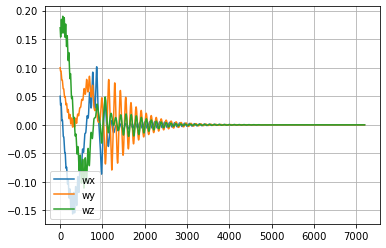

In [7]:
#, t_eval = t_eval, rtol  =1e-10, atol = 1e-10
y = sol_dbl_int.y.T
#print(sol_dbl_int.y, sol_dbl_int.y.shape)
plt.plot(t_eval, y[:,0], label = 'wx')
plt.plot(t_eval, y[:,1], label = 'wy')
plt.plot(t_eval, y[:,2], label = 'wz')
plt.legend(loc='lower left')
plt.grid()
plt.show()

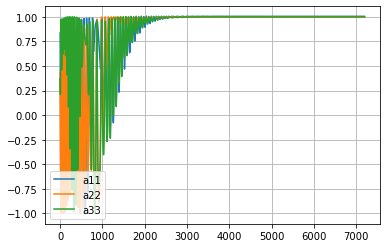

In [8]:
plt.plot(t_eval, y[:,3], label = 'a11')
plt.plot(t_eval, y[:,7], label = 'a22')
plt.plot(t_eval, y[:,11], label = 'a33')
plt.legend(loc='lower left')
plt.grid()
plt.show()